# Explore here

Cargamos las fotos de los animales y los visualizamos

2025-04-15 02:02:03.506805: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-15 02:02:03.511380: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-15 02:02:03.521960: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744682523.538692    2939 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744682523.543667    2939 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744682523.558972    2939 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

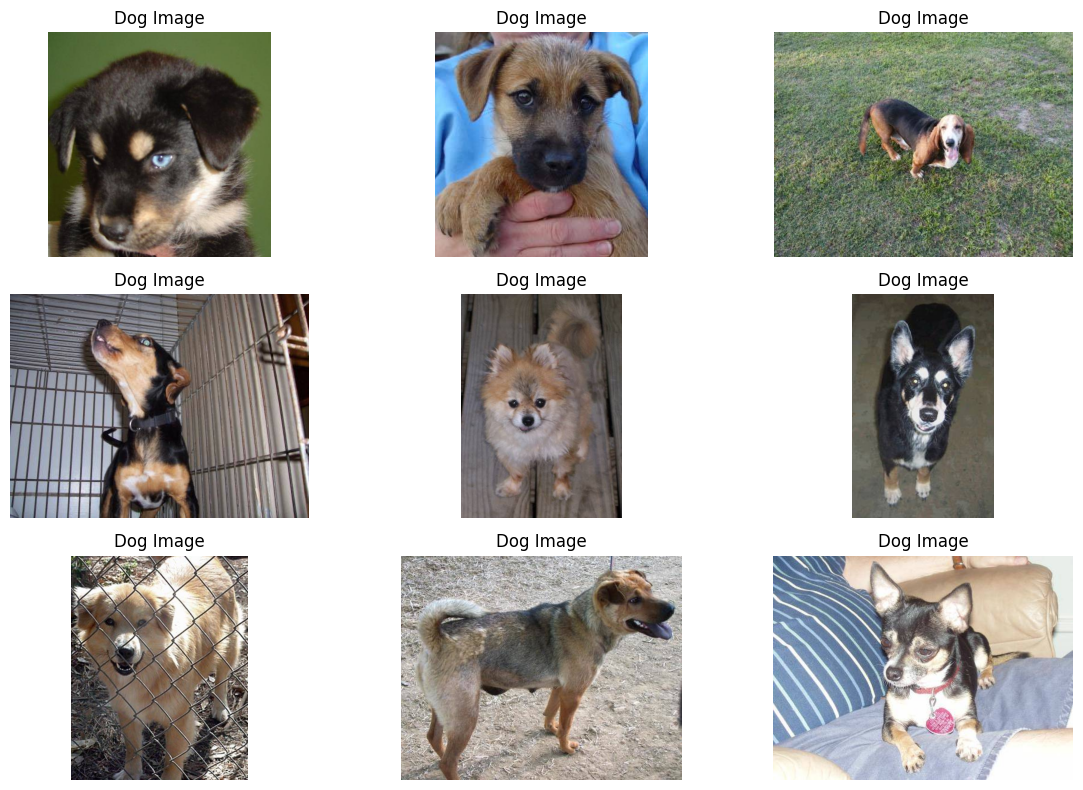

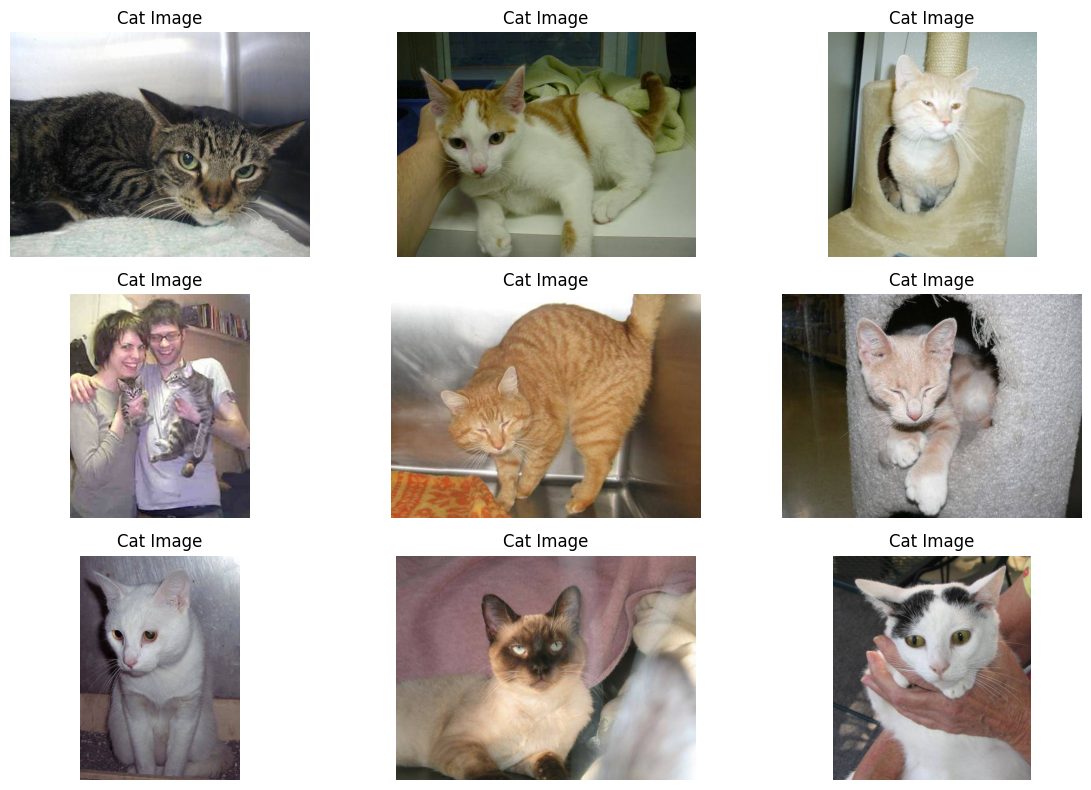

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import Adam

data_dir = "../data/raw"

dog_subfolder = os.path.join(data_dir, "dog")

dog_image_files = os.listdir(dog_subfolder)

dog_images = []
for i in range(9):
    img_path = os.path.join(dog_subfolder, dog_image_files[i])
    img = image.load_img(img_path)  
    img_array = image.img_to_array(img)
    img_array /= 255.0  
    dog_images.append(img_array)

plt.figure(figsize=(12, 8))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(dog_images[i])
    plt.title('Dog Image')
    plt.axis('off')

plt.tight_layout()

plt.show()

data_dir = "../data/raw"

cats_subfolder = os.path.join(data_dir, "cat")

cats_image_files = os.listdir(cats_subfolder)

cats_images = []
for i in range(min(9, len(cats_image_files))):  
    img_path = os.path.join(cats_subfolder, cats_image_files[i])
    img = image.load_img(img_path)
    img_array = image.img_to_array(img)
    img_array /= 255.0
    cats_images.append(img_array)

plt.figure(figsize=(12, 8))

for i in range(len(cats_images)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(cats_images[i])
    plt.title('Cat Image')
    plt.axis('off')

plt.tight_layout()

plt.show()

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "../data/raw"
train_dir = data_dir
image_size = (224, 224)

datagentrain = ImageDataGenerator(rescale=1.0 / 255)
datagentest = ImageDataGenerator(rescale=1.0 / 255)

train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=32,
    class_mode="categorical" 
)


test_data = datagentest.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=32,
    class_mode="categorical"
)

Found 18 images belonging to 2 classes.
Found 18 images belonging to 2 classes.


Construimos el RNA

In [3]:
model = Sequential([
    Conv2D(64, (3,3), padding="same", activation="relu", input_shape=(224,224,3)),
    Conv2D(64, (3,3), padding="same", activation="relu"),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),

    Conv2D(128, (3,3), padding="same", activation="relu"),
    Conv2D(128, (3,3), padding="same", activation="relu"),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),

    Conv2D(256, (3,3), padding="same", activation="relu"),
    Conv2D(256, (3,3), padding="same", activation="relu"),
    Conv2D(256, (3,3), padding="same", activation="relu"),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),

    Conv2D(512, (3,3), padding="same", activation="relu"),
    Conv2D(512, (3,3), padding="same", activation="relu"),
    Conv2D(512, (3,3), padding="same", activation="relu"),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),

    Conv2D(512, (3,3), padding="same", activation="relu"),
    Conv2D(512, (3,3), padding="same", activation="relu"),
    Conv2D(512, (3,3), padding="same", activation="relu"),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),

    Flatten(),
    Dense(4096, activation="relu"),
    Dense(4096, activation="relu"),
    Dense(2, activation="softmax")  
])

/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-15 02:05:40.174586: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
